# **AP155 Lab Assignment**
## Module 1: Integrals and Derivatives

_Instructions_: Answer each problem as completely as you can. Discuss **all** your answers as clearly and concisely as possible.

_Scoring Criteria_: 50% - *correctness of code*; 50% - *discussion of the code and results*. Maximum score is **100 points**.




### Student Information

_Full Name_: Bendejo, Kevin D. \
_Student No._:2022-08528 \
_Section_:THV-TX-2

### Submission Information

_Date and Time Submitted (most recent upload)_:

**HONOR PLEDGE** I affirm that I have upheld the highest principles of honesty and integrity in my academic work and that this lab assignment is my own work.

**Sign here with your full name:** Kevin Bendejo

<font color='red'>GC Belinario: Provide the Date and Time of submission next time.</font>

### Grading Information (c/o Lab Instructor)

TOTAL SCORE: <font color='red'>**80/100**</font>

Score breakdown:
* Problem 1 - <font color='red'>**30/30**</font>
* Problem 2 - <font color='red'>**30/30**</font>
* Problem 3 - <font color='red'>**20/40**</font>

_<font color='red'>**Checked on  25 September 2025 3:01 PM**</font>_ \
_<font color='red'>**signed GC Belinario**</font>_

### PROBLEM 1
**Integration using the trapezoidal rule and Simpson's rule**

Calculate the integral of the function $ 2x^4 + 3x^2 + 4x + 5$ from $x=0$ to $x=5$.

1. Do the numerical calculation using the trapezoidal rule with 10, 100, and 1,000 slices. Describe each step of the calculation clearly and concisely. *(10 pts.)*

2. What are the percentage errors of your answers in (1)? *(10 pts.)*

3. Repeat the calculation using Simpson's rule with 10, 100, and 1,000 slices. Describe each step of the calculation clearly and concisely. *(5 pts.)*

4. What are the percentage errors of your answers in (3)? How do they compare with the results from (1) for the same number of slices? *(5 pts.)*

In [78]:
#Integrating Using the Trapizoidal Method

import numpy as np #Import numpy

#Defining the Integrand f(x)
def f(x):
    return 2*x**4 + 3*x**2 + 4*x + 5

# Defining a function that Integrates the f(x) using the Trapizoidal method with arguments:
# N = number of slices
# a = lower bound
# b = upper bound
def integ_trap(N, a, b):
    h = (b-a)/N # h is the width of the equally sliced trapezoids
    #let I be the integral of f(x)
    I = 0.5*f(a) + 0.5*f(b) # Setting the initial value for I
    # getting the summation of f(a + k*h) then adding it to I
    for k in range (1, N): 
        I += f(a + k*h)  
    I = h*I # Multiplying by a factor of h to get the final answer for I with N slices
    return I # the function integ_trap(N, a, b) outputs I

# Naming the given values in the problem

# Since it was asked to calculate the integral of f(x) using 10, 100, and 1000 slices
# It was set into an array for easier and more concise code
N_arr = np.array([10, 100, 1000])  
#Defining the integral (I) and error (E) as an array I_arr and E_arr
I_arr = np.array([0.,0.,0.]) # the "0."s allow the later value for I_arr to precise
E_arr = np.zeros(len(N_arr))# another way to express np.array([0.,0.,0.])
# boundary points a & b
a = 0.0
b = 5.0
def g(x):
    return (2.0/5.0)*x**5 + x**3 + 2*x**2 + 5*x
exact_s = g(b) - g(a)


In [82]:
#Simpson's rule with 10, 100, and 1000 slices
def integ_simp(N,a,b):
    h = (b-a)/N
    s = f(a) + f(b)
    for k in range (1, N, 2):
        s += 4 * f(a+k*h)
    for k in range (2, N, 2):
        s += 2*f(a + k*h)
    return s*(1/3)*h

Isimp_arr = np.zeros(len(N_arr))

#showing of results
print ("Integrating using Trapezoidal Method")
for k in range (len(N_arr)):
    I_arr[k] = integ_trap(N_arr[k], a, b) #solving the integrals using trapezoidal method
    E_arr[k] = 100*abs(((I_arr[k])-exact_s)/exact_s) # calculatin the percent error
    print ("Slices: " + str(N_arr[k]), "Integral: " + str(I_arr [k]), "%Error: "+str(E_arr[k])) # prints the output so we can see them

print ("Integrating using Simpson's Rule")
for j in range (len(N_arr)):
    Isimp_arr[j] = integ_simp(N_arr[j], a, b)
    E_arr[j] = 100*abs(((Isimp_arr[j])-exact_s)/exact_s) # calculatin the percent error
    print("Slices: " + str(N_arr[j]), "Integral: " + str(Isimp_arr[j]), "%Error: "+str(E_arr[j])) # prints the output so we can see them

print ("The results using the Simpson's Rule are much more accurate to the exact answer than using the Trapezoidal Method with the same number of slices")

Integrating using Trapezoidal Method
Slices: 10 Integral: 1471.4375 %Error: 1.478448275862069
Slices: 100 Integral: 1450.2145812500003 %Error: 0.014798706896569988
Slices: 1000 Integral: 1450.0021458331234 %Error: 0.00014798849127240326
Integrating using Simpson's Rule
Slices: 10 Integral: 1450.0833333333333 %Error: 0.005747126436776382
Slices: 100 Integral: 1450.0000083333337 %Error: 5.747126657485657e-07
Slices: 1000 Integral: 1450.0000000008342 %Error: 5.753338035870472e-11
The results using the Simpson's Rule are much more accurate to the exact answer than using the Trapezoidal Method with the same number of slices


### PROBLEM 2

**Integration using Gaussian quadrature**

Calculate the integral from Problem 1 using the Gaussian quadrature method: $ 2x^4 + 3x^2 + 4x + 5$ from $x=0$ to $x=5$.

1. Define the function $\tt gaussxw$ from Appendix E of the Newman text (and run the cell). *(10 pts.)*

2. Calculate the integral using the $\tt gaussxw$ function in (1) and number of slices $N = 3$. Describe each step in the calculation clearly and concisely. *(20 pts.)*

In [1]:
from numpy import ones,copy,cos,tan,pi,linspace

def gaussxw(N):

    # Initial approximation to roots of the Legendre polynomial
    a = linspace(3,4*N-1,N)/(4*N+2)
    x = cos(pi*a+1/(8*N*N*tan(a)))

    # Find roots using Newton's method
    epsilon = 1e-15
    delta = 1.0
    while delta>epsilon:
        p0 = ones(N,float)
        p1 = copy(x)
        for k in range(1,N):
            p0,p1 = p1,((2*k+1)*x*p1-k*p0)/(k+1)
        dp = (N+1)*(p0-x*p1)/(1-x*x)
        dx = p1/dp
        x -= dx
        delta = max(abs(dx))

    # Calculate the weights
    w = 2*(N+1)*(N+1)/(N*N*(1-x*x)*dp*dp)
    return x,w
def gaussxwab(N,a,b):
    x,w = gaussxw(N)
    return 0.5*(b-a)*x+0.5*(b+a), 0.5*(b-a)*w



In [9]:
#Defining the function f(x) to be integrated
def f(x):
    return 2*x**4 + 3*x**2 + 4*x + 5

#defining the given values to be used
N=3
a=0
b=5
h=(b-a)/N

xp,wp = gaussxwab (N,a,b) #rescaling of sumple points with their corresponding weight

#Let s be the definite integral of f(x)

s=0.0 #initializing s
#Summing of the points and their weight
for k in range (N):
    s += wp[k]*f(xp[k])
error = abs((1450-s)/s)
print ("Integrating using Gaussian Quadrature")
print("Slices: " + str(N), "Integral: " + str(s), "%Error: "+str(error))

Integrating using Gaussian Quadrature
Slices: 3 Integral: 1450.000000000002 %Error: 1.4112848820614383e-15


### PROBLEM 3

**Physics Application: Anharmonic Oscillator**

_Refer to Exercise 5.10 of the Newman text._ Consider an anharmonic oscillator with potential $V(x)$ symmetric about $x = 0$. Let us set our anharmonic oscillator going with amplitude $a$. That is, at $t = 0$ we release it from rest at position $x = a$ and it swings back towards the origin. Then at $t = 0$ we have $dx/dt = 0$ and the equation for its total energy becomes $E = V(a)$, i.e., the total energy of the particle is given in terms of the amplitude.

When the particle reaches the origin for the first time, it has gone through one quarter of a period of the oscillator. The period $T$ is given by: $$ T = \sqrt{8m} \int_0^a \frac{dx}{\sqrt{V(a)-V(x)}}. $$

1. Suppose the potential is $V(x) = x^4$ and the mass of the particle is $m = 1$. Write a Python function that calculates the period of the oscillator for given amplitude a using Gaussian quadrature with $N = 20$ points. Describe each step clearly and concisely. *(20 pts.)*

2. Use your function to make a graph of the period for amplitudes ranging from $a = 0$ to $a = 2$. Describe the behavior you find and explain these results clearly and concisely. *(20 pts.)*

In [21]:
from numpy import ones, copy, cos, tan, pi, linspace

def gaussxw(N):
    #Initialize approximation to roots of the Legendre Polynomial
    a = linspace(3, 4*N-1, N)/(4*N+2) #define linspace and arguments
    x = cos (pi*a+1/(8*N*N*tan(a)))
    # Find roots using newton's method
    epsilon = 1e-15
    delta=1.0
    while delta>epsilon:
        p0 = ones(N, float) #define what is ones
        p1 = copy (x) # define what is copy
        for k in range (1,N):
            p0,p1 = p1, ((2*k+1)*x*p1-k*p0)/(k+1)
        dp = (N+1)*(p0-x*p1)/(1-x*x)
        dx = p1/dp
        x -= dx 
        delta = max(abs(dx))
    #Calculate the weights
    w = 2*(N+1)*(N+1)/(N*N*(1-x*x)*dp*dp)
    return x,w
def g(x):
    return x**4
def f(x):
    return ((8)**(1/2))/(g(b)-g(x))
N=20
a=0
b=c
h=(b-a)/N
s=0.0
x,w = gaussxw(N)
xp = 0.5*(b-a)*x +0.5*(b+a)
wp = 0.5*(b-a)*w
for k in range (N):
    s += wp[k]*f(xp[k])

print (s)

NameError: name 'c' is not defined

In [21]:
from numpy import ones, copy, cos, tan, pi, linspace

def gaussxw(N):
    #Initialize approximation to roots of the Legendre Polynomial
    a = linspace(3, 4*N-1, N)/(4*N+2) #define linspace and arguments
    x = cos (pi*a+1/(8*N*N*tan(a)))
    # Find roots using newton's method
    epsilon = 1e-15
    delta=1.0
    while delta>epsilon:
        p0 = ones(N, float) #define what is ones
        p1 = copy (x) # define what is copy
        for k in range (1,N):
            p0,p1 = p1, ((2*k+1)*x*p1-k*p0)/(k+1)
        dp = (N+1)*(p0-x*p1)/(1-x*x)
        dx = p1/dp
        x -= dx 
        delta = max(abs(dx))
    #Calculate the weights
    w = 2*(N+1)*(N+1)/(N*N*(1-x*x)*dp*dp)
    return x,w
def g(x):
    return x**4
def f(x):
    return ((8)**(1/2))/(g(b)-g(x))
N=20
a=0
b=c
h=(b-a)/N
s=0.0
x,w = gaussxw(N)
xp = 0.5*(b-a)*x +0.5*(b+a)
wp = 0.5*(b-a)*w
for k in range (N):
    s += wp[k]*f(xp[k])

print (s)

NameError: name 'c' is not defined

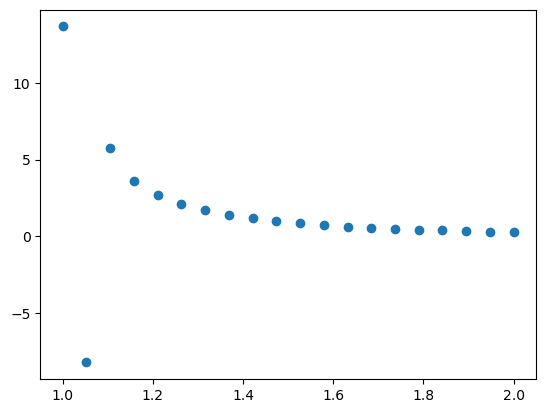

In [35]:
import numpy as np
from numpy import ones,copy,cos,tan,pi,linspace
import matplotlib.pyplot as plt
def gaussxw(N):

    # Initial approximation to roots of the Legendre polynomial
    a = linspace(3,4*N-1,N)/(4*N+2)
    x = cos(pi*a+1/(8*N*N*tan(a)))

    # Find roots using Newton's method
    epsilon = 1e-15
    delta = 1.0
    while delta>epsilon:
        p0 = ones(N,float)
        p1 = copy(x)
        for k in range(1,N):
            p0,p1 = p1,((2*k+1)*x*p1-k*p0)/(k+1)
        dp = (N+1)*(p0-x*p1)/(1-x*x)
        dx = p1/dp
        x -= dx
        delta = max(abs(dx))

    # Calculate the weights
    w = 2*(N+1)*(N+1)/(N*N*(1-x*x)*dp*dp)
    return x,w
def gaussxwab(N,a,b):
    x,w = gaussxw(N)
    return 0.5*(b-a)*x+0.5*(b+a), 0.5*(b-a)*w

N=20
a=0
b=np.linspace (1,2,N)
h=(b-a)/N

def f(x):
    return (1/(b**4-x**4))
s=0.0
xp,wp = gaussxwab(N,a,b)
for k in range (N):
    s += wp[k]*f(xp[k])
s = ((8)**(1/2))*s
plt.scatter (b, s)
plt.show()

<font color='red'>GC Belinario: -20 points for the errors caused by the undefined value of</font> `c`<font color='red'>, lack of Python function for the calculation of the integral, unlabeled graph, outlier in the graph, lack of sufficient explanation of the code, and lack of explanation of the result.</font> 